# Udacity Data Analyst Nanodegree Data Wrangling Project 
## Wrangle Twitter Data
The following notebook is the 7th project in Udacity's Data Analyst Nanodegree. The project requirements are:
1.  Gather data from three different sources.
2.  Assess data and find any quality issues or tidiness issues
3.  Clean data to be free from any issues previously noted.
4.  Analyze the resulting data set. 

### 1. Gathering Data

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

In [2]:
#First lets upload and read the file at hand 
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Then lets download the file stored on udacity's server 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'tweet-predictions.tsv'
response = requests.get(url, stream=True)
with open(file_name, 'wb') as f:
    for chunk in response.iter_content(chunk_size=1024): 
        if chunk:
            f.write(chunk)

In [3]:
#check to see file
twi_pred_df = pd.read_csv('tweet-predictions.tsv',sep='\t')
twi_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
#finally, lets scrap twitter for dog tweet data

consumer_key ='consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_token_secret = 'access_token_secret'
try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
except tweepy.TweepError as t:
    print(t.message)

In [6]:
api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)
tweets = twitter_df['tweet_id']

tweet_data = []
for tweet_id in tweets:
    try:
        temp = api.get_status(tweet_id)._json
        tweet_data.append({'tweet_id':temp['id'],
                           'created_at':temp['created_at'],
                           'favorite_count':temp['favorite_count'],
                           'favorited':temp['favorited'],
                           'retweet_count':temp['retweet_count'],
                           'retweeted':temp['retweeted']})
        print(str(tweet_id) + ': done')
    except tweepy.TweepError as t:
        print('{} : {}'.format(tweet_id, t))

892420643555336193: done
892177421306343426: done
891815181378084864: done
891689557279858688: done
891327558926688256: done
891087950875897856: done
890971913173991426: done
890729181411237888: done
890609185150312448: done
890240255349198849: done
890006608113172480: done
889880896479866881: done
889665388333682689: done
889638837579907072: done
889531135344209921: done
889278841981685760: done
888917238123831296: done
888804989199671297: done
888554962724278272: done
888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136: done
887705289381826560: done
887517139158093824: done
887473957103951883: done
887343217045368832: done
887101392804085760: done
886983233522544640: done
886736880519319552: done
886680336477933568: done
886366144734445568: done
886267009285017600: done
886258384151887873: done
886054160059072513: done
885984800019947520: done
885528943205470208: done
885518971528720385: done
885311592912609280: done
885167619883638784:

835574547218894849: done
835536468978302976: done
835309094223372289: done
835297930240217089: done
835264098648616962: done
835246439529840640: done
835172783151792128: done
835152434251116546: done
834931633769889797: done
834786237630337024: done
834574053763584002: done
834477809192075265: done
834458053273591808: done
834209720923721728: done
834167344700198914: done
834089966724603904: done
834086379323871233: done
833863086058651648: done
833826103416520705: done
833732339549220864: done
833722901757046785: done
833479644947025920: done
833124694597443584: done
832998151111966721: done
832769181346996225: done
832757312314028032: done
832682457690300417: done
832645525019123713: done
832636094638288896: done
832397543355072512: done
832369877331693569: done
832273440279240704: done
832215909146226688: done
832215726631055365: done
832088576586297345: done
832040443403784192: done
832032802820481025: done
831939777352105988: done
831926988323639298: done
831911600680497154: done


794355576146903043: done
794332329137291264: done
794205286408003585: done
793962221541933056: done
793845145112371200: done
793614319594401792: done
793601777308463104: done
793500921481273345: done
793286476301799424: done
793271401113350145: done
793256262322548741: done
793241302385262592: done
793226087023144960: done
793210959003287553: done
793195938047070209: done
793180763617361921: done
793165685325201412: done
793150605191548928: done
793135492858580992: done
793120401413079041: done
792913359805018113: done
792883833364439040: done
792773781206999040: done
792394556390137856: done
792050063153438720: done
791821351946420224: done
791784077045166082: done
791780927877898241: done
791774931465953280: done
791672322847637504: done
791406955684368384: done
791312159183634433: done
791026214425268224: done
790987426131050500: done
790946055508652032: done
790723298204217344: done
790698755171364864: done
790581949425475584: done
790337589677002753: done
790277117346975746: done


752173152931807232: done
751950017322246144: done
751937170840121344: done
751830394383790080: done
751793661361422336: done
751598357617971201: done
751583847268179968: done
751538714308972544: done
751456908746354688: done
751251247299190784: done
751205363882532864: done
751132876104687617: done
750868782890057730: done
750719632563142656: done
750506206503038976: done
750429297815552001: done
750383411068534784: done
750381685133418496: done
750147208377409536: done
750132105863102464: done
750117059602808832: done
750101899009982464: done
750086836815486976: done
750071704093859840: done
750056684286914561: done
750041628174217216: done
750026558547456000: done
750011400160841729: done
749996283729883136: done
749981277374128128: done
749774190421639168: done
749417653287129088: done
749403093750648834: done
749395845976588288: done
749317047558017024: done
749075273010798592: done
749064354620928000: done
749036806121881602: done
748977405889503236: done
748932637671223296: done


709198395643068416: done
709179584944730112: done
709158332880297985: done
709042156699303936: done
708853462201716736: done
708845821941387268: done
708834316713893888: done
708810915978854401: done
708738143638450176: done
708711088997666817: done
708479650088034305: done
708469915515297792: done
708400866336894977: done
708356463048204288: done
708349470027751425: done
708149363256774660: done
708130923141795840: done
708119489313951744: done
708109389455101952: done
708026248782585858: done
707995814724026368: done
707983188426153984: done
707969809498152960: done
707776935007539200: done
707741517457260545: done
707738799544082433: done
707693576495472641: done
707629649552134146: done
707610948723478529: done
707420581654872064: done
707411934438625280: done
707387676719185920: done
707377100785885184: done
707315916783140866: done
707297311098011648: done
707059547140169728: done
707038192327901184: done
707021089608753152: done
707014260413456384: done
706904523814649856: done


685973236358713344: done
685943807276412928: done
685906723014619143: done
685681090388975616: done
685667379192414208: done
685663452032069632: done
685641971164143616: done
685547936038666240: done
685532292383666176: done
685325112850124800: done
685321586178670592: done
685315239903100929: done
685307451701334016: done
685268753634967552: done
685198997565345792: done
685169283572338688: done
684969860808454144: done
684959798585110529: done
684940049151070208: done
684926975086034944: done
684914660081053696: done
684902183876321280: done
684880619965411328: done
684830982659280897: done
684800227459624960: done
684594889858887680: done
684588130326986752: done
684567543613382656: done
684538444857667585: done
684481074559381504: done
684460069371654144: done
684241637099323392: done
684225744407494656: done
684222868335505415: done
684200372118904832: done
684195085588783105: done
684188786104872960: done
684177701129875456: done
684147889187209216: done
684122891630342144: done


674045139690631169: done
674042553264685056: done
674038233588723717: done
674036086168010753: done
674024893172875264: done
674019345211760640: done
674014384960745472: done
674008982932058114: done
673956914389192708: done
673919437611909120: done
673906403526995968: done
673887867907739649: done
673716320723169284: done
673715861853720576: done
673711475735838725: done
673709992831262724: done
673708611235921920: done
673707060090052608: done
673705679337693185: done
673700254269775872: done
673697980713705472: done
673689733134946305: done
673688752737402881: done
673686845050527744: done
673680198160809984: done
673662677122719744: done
673656262056419329: done
673636718965334016: done
673612854080196609: done
673583129559498752: done
673580926094458881: done
673576835670777856: done
673363615379013632: done
673359818736984064: done
673355879178194945: done
673352124999274496: done
673350198937153538: done
673345638550134785: done
673343217010679808: done
673342308415348736: done


667766675769573376: done
667728196545200128: done
667724302356258817: done
667550904950915073: done
667550882905632768: done
667549055577362432: done
667546741521195010: done
667544320556335104: done
667538891197542400: done
667534815156183040: done
667530908589760512: done
667524857454854144: done
667517642048163840: done
667509364010450944: done
667502640335572993: done
667495797102141441: done
667491009379606528: done
667470559035432960: done
667455448082227200: done
667453023279554560: done
667443425659232256: done
667437278097252352: done
667435689202614272: done
667405339315146752: done
667393430834667520: done
667369227918143488: done
667211855547486208: done
667200525029539841: done
667192066997374976: done
667188689915760640: done
667182792070062081: done
667177989038297088: done
667176164155375616: done
667174963120574464: done
667171260800061440: done
667165590075940865: done
667160273090932737: done
667152164079423490: done
667138269671505920: done
667119796878725120: done


In [7]:
json.dump(tweet_data,open('tweet_data.txt', 'w', encoding="utf8"), ensure_ascii=False, indent=4)
print('completed')

completed


In [4]:
#read json file into pandas dataframe
with open('tweet_data.txt','r') as f:
    data = json.load(f)
scrapped_df = pd.DataFrame(data)
scrapped_df.head()

,created_at,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,38074,False,8328,False,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,32681,False,6151,False,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,24592,False,4070,False,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,41431,False,8471,False,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,39611,False,9166,False,891327558926688256


The data had to be gathered from three different places:
1.  The file at hand which is the WeRateDogs Twitter archive int the file 'twitter_archive_enhanced.csv'
2.  The tweet image predictions kept at Udacity's file server. It has to be programatically downloaded.
3.  Each tweet's retweet count, favourite count and any other information that might be interesting to be scrapped from the twitter webiste using the twitter api to be saved in tweet_text.txt

While the first one was simple, I had to use the requests library for the second one and save data in chunks so as to not overload my memory. The third one was tricky because it included getting a know how of the Twitter API, Tweepy, which came with its limitations such as Rate Limit (which I set to be True) and converting everything into proper JSON format. As a result, I also had to make use of the Python JSON library. 

### 2. Assessing The Data 

My three data frames are twitter_df, twi_pred_df, and scrapped_df

# 1.

In [5]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

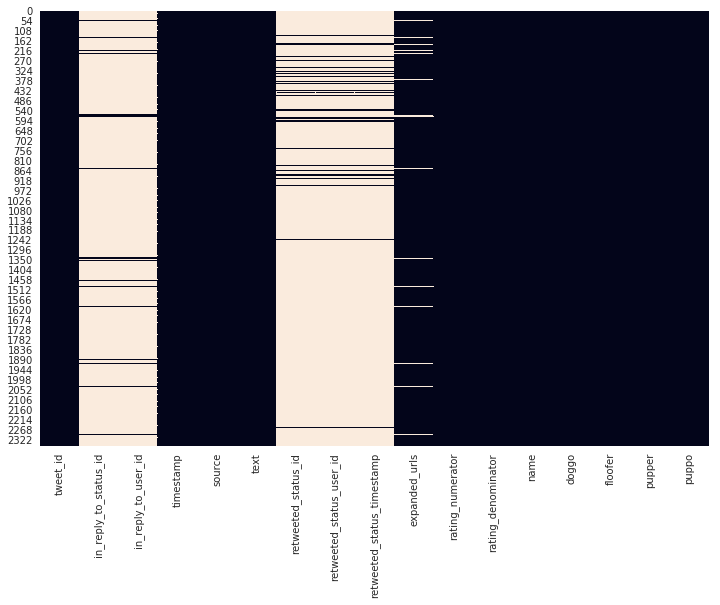

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(twitter_df.isnull(), cbar=False)


In [7]:
twi_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
scrapped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 6 columns):
created_at        2339 non-null object
favorite_count    2339 non-null int64
favorited         2339 non-null bool
retweet_count     2339 non-null int64
retweeted         2339 non-null bool
tweet_id          2339 non-null int64
dtypes: bool(2), int64(3), object(1)
memory usage: 77.7+ KB


-  These are all large data sets, however, we can plainly see some issues with this. The 181 tweets in twitter_df are retweets that have to be removed.
-  There are 2 columns in twitter_df which have less than a 100 count and thus, can be deleted.
-  The number of rows in the all three of the data frames are different, with 2342 in scrapped_df, 2075 in twi_pred_df and 2356 in twitter_df and hence there will only be an inner join performed on all to remove any tweets for which we have no data. 

From a visual analysis we can see that the columns source and expanded urls should be removed as they contain data we would not need for analysis. All urls are unique. Also the dog stage columns form a sparse matrix and can easily be incorporated into a single column  

# 2.

In [9]:
twitter_df[twitter_df['expanded_urls'].duplicated()].count()

tweet_id                      137
in_reply_to_status_id          54
in_reply_to_user_id            54
timestamp                     137
source                        137
text                          137
retweeted_status_id             1
retweeted_status_user_id        1
retweeted_status_timestamp      1
expanded_urls                  79
rating_numerator              137
rating_denominator            137
name                          137
doggo                         137
floofer                       137
pupper                        137
puppo                         137
dtype: int64

In [10]:
twitter_df['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/762699858130116608/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/698195409219559425/photo/1                                                                                                                                                          

The expanded url gives us a more indepth view of the tweets that are duplicated. I tried to find duplicates via the tweet_id column but being an integer column, it was not much help. Hence, this column shows that 137 tweets are duplicates. To confirm this, I also analysed a few visually i.e. by opening the dataset and finding the two rows with the same expanded_url.

In [11]:
twi_pred_df[twi_pred_df['jpg_url'].duplicated()].count()

tweet_id    66
jpg_url     66
img_num     66
p1          66
p1_conf     66
p1_dog      66
p2          66
p2_conf     66
p2_dog      66
p3          66
p3_conf     66
p3_dog      66
dtype: int64

The same is the case with the the predictions. There are 66 duplicated rows which can only be figured out by looking at the image urls. There is no need to check the scrapped df as it will be combined with the twitter_df and as a result, no duplicates will be taken into account.

# 3.

In [12]:
len(twi_pred_df) - len(twi_pred_df[(twi_pred_df['p1_dog']== True) & (twi_pred_df['p2_dog'] == True) & (twi_pred_df['p3_dog'] == True)])

832

In [13]:
len(twi_pred_df) - len(twi_pred_df[(twi_pred_df['p1_dog']== True) | (twi_pred_df['p2_dog'] == True) | (twi_pred_df['p3_dog'] == True)])

324

Out of 2075 entries, there are 832 entries where there are chances that the image is not a dog. However, I also checked the length where the predictions are mixed and I see that 324 entries are still present where all three of the predictions are not dogs. To confirm this, lets check some of the rows of the 324. And sure enough, the images are definately not of dogs. 

In [14]:
temp_df = twi_pred_df[(twi_pred_df['p1_dog']== False) | (twi_pred_df['p2_dog'] == False) | (twi_pred_df['p3_dog'] == False)]
temp_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False


# 4.
We can also benefit from cleaning the categories of dogs predicticted. Removing the underscores and lowercasing the predictions will improve analysis alot

In [15]:
twi_pred_df['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

# 5.

/home/sando/files/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


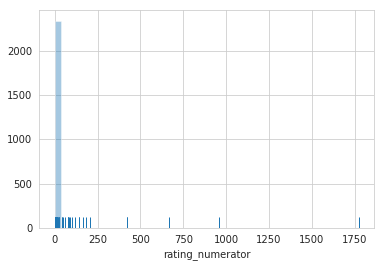

In [16]:
sns.distplot(twitter_df['rating_numerator'], kde=False, rug=True)

In [17]:
twitter_df['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

/home/sando/files/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Ratings')

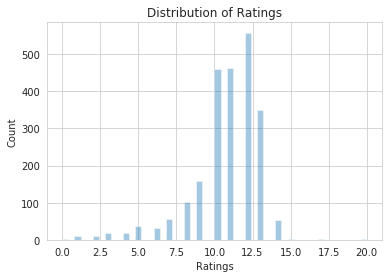

In [18]:
x = twitter_df[twitter_df['rating_numerator']<= 20.0].rating_numerator
sns.distplot(x, kde=False)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

In [19]:
twitter_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

The initial rating neumerator shows there are some obvious outliers in the dataframe. Thus, the bar chart has only a single line. To check this, I used the describe function and obviously, I saw that while the mean is 13, the max is 1776. To get a more complete veiw of the neumerators, I did a value counts and I see that there are alot of values which are outliers, but there are also values below 10 which is unlike the unique rating system.

# 6.

In [20]:
twitter_df['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

/home/sando/files/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


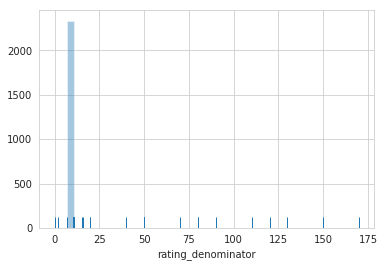

In [21]:
sns.distplot(twitter_df['rating_denominator'], kde=False, rug=True)

In [22]:
twitter_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

The same is the problem with the denominator. While it should be 10, other values are also seen


The final list of issues I found is as follows:

**Quality Issues**
-  Missing values in 5 full columns in the tweet_enchanced table. 
-  Most of the rows do not have a dog stage
-  Information about all tweets did not come back so different number of rows in each dataframe.
-  Some of the pictures are dogs at all (all three are predictions are false) but there is no category attached to these. 
-  There are retweets found with a retweeted_status.
-  Dog names are mislabelled, mispelled and missing.
-  There are underscores found in many of the predictions. 
-  There needs to be consistancy in the predictions for further evaluations. All predictions should be either fully lowercase or uppercase.
-  Duplicates in the three dataframes.
-  Rating Issues: Some denominators are not 10, while some numerators are below 10. Some tweets do not have ratings.
-  All tweet_id columns should be in string. 
-  Datatypes are not consistant

**Tidiness Issues**
-  All three dataframes can be combined.
-  The dog stage is in 4 different columns 
-  Urls are not needed for analysis as I cannot infer anything from the  
-  Date and time can be separated into date columns and time columns for easier analysis


### 3. Data Cleaning

I shall pick each of these issues and try and clean the data set, then testing will be done on it. 

In [23]:
#first lets duplicate each of the dataframes to ensure no data is lost
c_twitter_df = twitter_df.copy()
c_twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [24]:
c_pred = twi_pred_df.copy()
c_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
c_scrapped = scrapped_df.copy()
c_scrapped.head()

,created_at,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,38074,False,8328,False,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,32681,False,6151,False,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,24592,False,4070,False,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,41431,False,8471,False,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,39611,False,9166,False,891327558926688256


**Issue: Retweets** <br>
**Define:** Remove all those rows where there is a retweet_status present i.e notnull == False.
181 rows will be removed in c_twitter_df<br>
**Code:**

In [26]:
c_twitter_df = c_twitter_df[c_twitter_df['retweeted_status_id'].notnull() == False]

**Test:** Length of before and after removal can be checked. It should be equal to the rows removed.

In [27]:
#check twitter_df
len_twitter = len(twitter_df)-len(c_twitter_df)
print('{}'.format(len_twitter))

181


**Issue: Duplicates** <br>
**Define:** Remove all rows where expanded urls is duplicated. 137 tweets will be removed in c_twitter_df <br>
**Code** 

In [28]:
c_twitter_df = c_twitter_df.drop_duplicates(subset = 'expanded_urls', keep='first')

**Test:** Length of before and after removal can be checked. 181 + 137.

In [29]:
len_twitter = len(twitter_df)-len(c_twitter_df)
print('{}'.format(len_twitter))

239


**Issue: Missing Values and Columns**<br>
**Define:** Remove all columns with missing values namely:  <br>
In c_twitter_df:
-  in_reply_to_status_id  
-  in_reply_to_user_id 
-  retweeted_status_id 
-  retweeted_status_user_id 
-  retweeted_status_timestamp
 <br>

**Code**

In [30]:
c_twitter_df = c_twitter_df.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

**Test:** The info() function will give us all the information we need to know. 

In [31]:
c_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2116 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


**Issue: Columns with same values, or unique values only**<br>
**Define:** Remove all columns where values are the same:  <br>
In c_twitter_df:
-  source 
-  expanded_urls

**Code** 

In [32]:
c_twitter_df = c_twitter_df.drop(columns=['expanded_urls','source'])

**Test:** The info() function will, once again, give us all the information we need to know. 

In [33]:
c_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
text                  2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(3), object(7)
memory usage: 181.9+ KB


**Issue: Datatypes**<br>
**Define:** Change data types to appropriate using the astype function.<br>
c_twitter_df 
-  tweet_id => string
-  timestamp => datetime

c_scrapped
-  created_at => datetime
-  tweet_id => string

c_pred
-  tweet_id => string

**Code**

In [34]:
c_twitter_df['tweet_id'] = c_twitter_df['tweet_id'].astype('str')

In [35]:
c_twitter_df['timestamp'] = pd.to_datetime(c_twitter_df['timestamp'])

In [36]:
c_scrapped['created_at'] = pd.to_datetime(c_scrapped['created_at'])
c_scrapped['tweet_id'] = c_scrapped['tweet_id'].astype('str')

In [37]:
c_pred['tweet_id'] = c_pred['tweet_id'].astype('str')

**Test:** the info function will give enough information

In [38]:
c_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
text                  2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 181.9+ KB


In [39]:
c_scrapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 6 columns):
created_at        2339 non-null datetime64[ns]
favorite_count    2339 non-null int64
favorited         2339 non-null bool
retweet_count     2339 non-null int64
retweeted         2339 non-null bool
tweet_id          2339 non-null object
dtypes: bool(2), datetime64[ns](1), int64(2), object(1)
memory usage: 77.7+ KB


In [40]:
c_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Issue: Sparse values in dog stages** <br>
**Define:** Use melt function to bring all four columns into 1 column.<br>
**Code** <br>
In using the melt function to pivot, I found another interesting thing: some rows have more than one dog stage. This would just mess with analysis later on so these rows will be removed. 

In [41]:
c_twitter_df['doggo'] = c_twitter_df['doggo'].replace('None', 0)
c_twitter_df['doggo'] = c_twitter_df['doggo'].replace('doggo', 1)
c_twitter_df['floofer'] = c_twitter_df['floofer'].replace('None', 0)
c_twitter_df['floofer'] = c_twitter_df['floofer'].replace('floofer', 1)
c_twitter_df['pupper'] = c_twitter_df['pupper'].replace('None', 0)
c_twitter_df['pupper'] = c_twitter_df['pupper'].replace('pupper', 1)
c_twitter_df['puppo'] = c_twitter_df['puppo'].replace('None', 0)
c_twitter_df['puppo'] = c_twitter_df['puppo'].replace('puppo', 1)
c_twitter_df['None'] = 0

In [42]:
#give a none value to all those rows which do not have a dog stage
c_twitter_df.loc[(c_twitter_df['puppo']+c_twitter_df['floofer']+c_twitter_df['pupper']+c_twitter_df['doggo'] == 0),'None'] = 1

In [43]:
#value counts of none to know how many rows to expect
c_twitter_df['None'].value_counts()

1    1779
0     338
Name: None, dtype: int64

In [44]:
#check for duplicates i.e where the sum is greater than 1
c_twitter_df[(c_twitter_df['puppo']+c_twitter_df['floofer']+c_twitter_df['pupper']+c_twitter_df['doggo']+c_twitter_df['None']> 1)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,None
191,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,13,10,None,1,0,0,1,0
200,854010172552949760,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but i...",11,10,None,1,1,0,0,0
460,817777686764523521,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""...",13,10,Dido,1,0,1,0,0
531,808106460588765185,2016-12-12 00:29:28,Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,1,0,1,0,0
565,802265048156610565,2016-11-25 21:37:47,"Like doggo, like pupper version 2. Both 11/10 ...",11,10,None,1,0,1,0,0
575,801115127852503040,2016-11-22 17:28:25,This is Bones. He's being haunted by another d...,12,10,Bones,1,0,1,0,0
705,785639753186217984,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,1,0,1,0,0
733,781308096455073793,2016-09-29 01:42:20,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,1,0,1,0,0
889,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,1,0,1,0,0
956,751583847268179968,2016-07-09 01:08:47,Please stop sending it pictures that don't eve...,5,10,None,1,0,1,0,0


These 12 rows can easily be removed from the dataset as they would be too much trouble for the analysis later on.

In [45]:
#remove the 12 rows 
c_twitter_df = c_twitter_df[~(c_twitter_df['puppo']+c_twitter_df['floofer']+c_twitter_df['pupper']+c_twitter_df['doggo']> 1)]

In [46]:
#check length
len(c_twitter_df)

2105

In [47]:
#check value counts again to know how many rows to expect 
c_twitter_df['None'].value_counts()

1    1779
0     326
Name: None, dtype: int64

In [48]:
#melt the 4 rows togehter
values = ['doggo', 'floofer', 'pupper', 'puppo', 'None']
ids = [x for x in list(c_twitter_df.columns) if x not in values]

c_twitter_df = pd.melt(c_twitter_df, id_vars = ids, value_vars = values, var_name='stage')

In [49]:
#only keep values where there is value 1
c_twitter_df = c_twitter_df[c_twitter_df.value == 1]
c_twitter_df.drop('value', axis=1, inplace=True)
c_twitter_df.reset_index(drop=True, inplace=True);
#change the type to category 
c_twitter_df.stage = c_twitter_df.stage.astype('category')

**Test:** A value_counts should be enough where 'None' should be equal to the count before. 

In [50]:
c_twitter_df['stage'].value_counts()

None       1779
pupper      222
doggo        72
puppo        23
floofer       9
Name: stage, dtype: int64

In [51]:
len(c_twitter_df)

2105

**Issue: Unclean Dog Predictions**<br>
**Define:** use the lower function to bring all predictions to lowercase and the replace function to deal with the underscores and spaces etc.<br>
**Code**

In [52]:
c_pred['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [53]:
c_pred['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
toy_terrier                        20
miniature_pinscher                 20
Samoyed                            20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [54]:
c_pred['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [55]:
c_pred['p1'] = c_pred['p1'].str.lower()
c_pred['p1'] = c_pred['p1'].replace([' ','-'],'_')
c_pred['p2'] = c_pred['p2'].str.lower()
c_pred['p2'] = c_pred['p2'].replace([' ','-'],'_')
c_pred['p3'] = c_pred['p3'].str.lower()
c_pred['p3'] = c_pred['p3'].replace([' ','-'],'_')

**Test:** doing a before and after value counts should show the difference, if any.

In [56]:
c_pred['p1'].value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
malamute                      30
cocker_spaniel                30
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            23
seat_belt                     22
siberian_husky                20
german_shepherd               20
staffordshire_bullterrier     20
cardigan                      19
web_site                      19
shetland_sheepdog             18
beagle                        18
maltese_dog                   18
eskimo_dog                    18
teddy                         18
rottweiler                    17
shih-tzu                      17
lakeland_terrier              17
italian_greyhound             16
kuvasz                        16
          

In [57]:
c_pred['p2'].value_counts()

labrador_retriever                104
golden_retriever                   92
cardigan                           74
chihuahua                          44
pomeranian                         42
french_bulldog                     41
chesapeake_bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
siberian_husky                     33
miniature_poodle                   33
beagle                             28
eskimo_dog                         27
collie                             27
pembroke                           27
kuvasz                             26
italian_greyhound                  22
american_staffordshire_terrier     21
pekinese                           21
toy_terrier                        20
samoyed                            20
chow                               20
malinois                           20
miniature_pinscher                 20
norwegian_elkhound                 19
boston_bull                        19
staffordshir

In [58]:
c_pred['p3'].value_counts()

labrador_retriever                79
chihuahua                         58
golden_retriever                  48
eskimo_dog                        38
kelpie                            35
kuvasz                            34
staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
pekinese                          29
pomeranian                        29
toy_poodle                        29
pembroke                          27
great_pyrenees                    27
chesapeake_bay_retriever          27
french_bulldog                    26
malamute                          26
american_staffordshire_terrier    24
pug                               23
cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
siberian_husky                    19
shetland_sheepdog                 17
boston_bull                       17
b

**Issue: Prediction is not a dog at all**<br>
**Define:** Make a separate prediction column with dog if all three predictions are true, not dog if all three are false and mixed if the predictions are differing<br>
**Code**

In [59]:
#convert p1_dog, p2_dog and p3_dog to 1 and 0
pred = ['p1_dog', 'p2_dog', 'p3_dog']
for p in pred:
    c_pred[p] = c_pred[p].astype(int)

In [60]:
#make a prediction column 
c_pred.loc[(c_pred['p1_dog']+c_pred['p2_dog']+c_pred['p3_dog'] == 0),'Prediction'] = 'not dog'
c_pred.loc[(c_pred['p1_dog']+c_pred['p2_dog']+c_pred['p3_dog'] == 1),'Prediction'] = 'mixed'
c_pred.loc[(c_pred['p1_dog']+c_pred['p2_dog']+c_pred['p3_dog'] == 2),'Prediction'] = 'mixed'
c_pred.loc[(c_pred['p1_dog']+c_pred['p2_dog']+c_pred['p3_dog'] == 3),'Prediction'] = 'dog'

**Test:** A simple value counts should suffice. This will vastly help with analysis

In [61]:
c_pred['Prediction'].value_counts()

dog        1243
mixed       508
not dog     324
Name: Prediction, dtype: int64

**Issue: Dog names are misspelled, mislabeled and missing**<br>
Doing a value counts shows that even 'a' and 'an' are values in the name column. Hence, these have to be fixed. Upon a visual analysis, it can be seen that there's a patter to the 'a' and 'an' and 'the'. The pattern is to pick the third word with 'This is' hoping that would be a name. For most of the tweets where this a problem, there is no dog name seen in the tweet text <br>
**Define:** As a result, all the incorrect names will be turned to none as that is the most likely option. <br>
**Code**

In [62]:
c_twitter_df['name'].value_counts()

None           616
a               55
Charlie         11
Lucy            11
Cooper          10
Oliver          10
Tucker           9
Penny            9
Sadie            8
Lola             8
Winston          8
Toby             7
Daisy            7
the              7
Koda             6
Bailey           6
Oscar            6
Jax              6
Bo               6
an               6
Stanley          6
Bella            6
Bentley          5
Buddy            5
Scout            5
Chester          5
Milo             5
Rusty            5
Dave             5
Leo              5
              ... 
Billy            1
Jeffri           1
Covach           1
Poppy            1
Tycho            1
Dallas           1
Goliath          1
Amélie           1
Mac              1
Steve            1
Beebop           1
Grizzie          1
JD               1
Griswold         1
Vinnie           1
Hazel            1
Lassie           1
Seamus           1
Norman           1
Shakespeare      1
Ralphson         1
Livvie      

In [63]:
#find those values which do not start with a capital letter
pd.set_option('display.max_colwidth', -1)
vals = c_twitter_df[~c_twitter_df['name'].str[0].str.isupper()]['name'].value_counts()
vals.keys()

Index(['a', 'the', 'an', 'very', 'one', 'quite', 'not', 'actually', 'just',
       'getting', 'light', 'unacceptable', 'life', 'old', 'by', 'officially',
       'his', 'space', 'my', 'such', 'mad', 'infuriating', 'this',
       'incredibly', 'all'],
      dtype='object')

In [64]:
for val in vals.keys():
    c_twitter_df['name'] = c_twitter_df['name'].replace(val,'None')
    
c_twitter_df['name'] = c_twitter_df['name'].replace('a','None')
c_twitter_df['name'] = c_twitter_df['name'].replace('an','None')
c_twitter_df['name'] = c_twitter_df['name'].replace('the','None')

**Test:** A simple value counts should suffice again

In [65]:
c_twitter_df['name'].value_counts()

None           718
Charlie        11 
Lucy           11 
Oliver         10 
Cooper         10 
Tucker         9  
Penny          9  
Winston        8  
Lola           8  
Sadie          8  
Toby           7  
Daisy          7  
Stanley        6  
Bo             6  
Jax            6  
Bella          6  
Bailey         6  
Koda           6  
Oscar          6  
Scout          5  
Rusty          5  
Bentley        5  
Milo           5  
Leo            5  
Louis          5  
Chester        5  
Dave           5  
Buddy          5  
Cassie         4  
Dexter         4  
              ..  
Jeffri         1  
Ole            1  
Carter         1  
Kirk           1  
Dallas         1  
Amélie         1  
Dex            1  
Davey          1  
Puff           1  
Mac            1  
Steve          1  
Beebop         1  
Grizzie        1  
JD             1  
Griswold       1  
Vinnie         1  
Hazel          1  
Lassie         1  
Seamus         1  
Norman         1  
Shakespeare    1  
Ralphson    

**Issue: Rating demonimator Issues**<br>
There are tweets which do not have 10 in their denomitors <br>
**Define:** This can be fixed by checking the text to see if the tweet has been wrongly marked. If there is actaully no proper denominator in the text, then simply remove them <br>
**Code**

In [66]:
#denominator issues
print("Count of tweets without '/10' in the text : {}".format(c_twitter_df[~c_twitter_df['text'].str.contains('/10')]['tweet_id'].count()))
print("Count of tweets without 10 rating_denominator : {}".format(c_twitter_df[c_twitter_df['rating_denominator'] != 10]['tweet_id'].count()))

Count of tweets without '/10' in the text : 13
Count of tweets without 10 rating_denominator : 18


In [67]:
#remove tweets without the rating of /10 in the text to make things easier
c_twitter_df = c_twitter_df[c_twitter_df['text'].str.contains('/10')]
print("Count of tweets without 10 rating_denominator {}:".format(c_twitter_df[c_twitter_df['rating_denominator'] != 10].tweet_id.count()))

Count of tweets without 10 rating_denominator 5:


In [68]:
#check those 5 tweets and manually fix them
c_twitter_df[c_twitter_df['rating_denominator'] != 10].text

1025    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1098    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                            
1128    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                       
1494    This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5 
2084    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv    
Name: text, dtype: object

We can plainly see that these tweets are proper and thus, can be manualy fixed. 

In [69]:
idx = c_twitter_df[c_twitter_df['rating_denominator'] != 10].index
for i in idx:
    c_twitter_df.at[i, 'rating_denominator'] = 10

**Test:** A simple value counts should suffice 

In [70]:
c_twitter_df['rating_denominator'].value_counts()

10    2092
Name: rating_denominator, dtype: int64

**Issue: Rating Numerator** <br>
**Define:** Check if the tweets' numerator index is correct. If incorrect manually check on what to be done with the tweet. Either it has to be fixed manually or removed. <br>
**Code**

In [71]:
c_twitter_df['rating_numerator'].value_counts()

12      484
10      435
11      415
13      292
9       154
8       98 
7       52 
14      40 
5       33 
6       32 
3       19 
4       16 
2       9  
1       5  
0       2  
75      1  
26      1  
50      1  
27      1  
1776    1  
420     1  
Name: rating_numerator, dtype: int64

In [72]:
cannot_parse = set()
incorrect = set()

for i in c_twitter_df.index:
    index = int(c_twitter_df.loc[i].text.find('/10'))
    try:
        numerator = int(c_twitter_df.loc[i].text[index-2:index].strip())
    except:
        cannot_parse.add(i)
        continue
    if numerator != c_twitter_df.loc[i].rating_numerator:
        incorrect.add(i)

print('Indexes this code cannot parse: {}'.format(len(cannot_parse)))
print('Incorrect rating_numerator indexes:{}'.format(len(incorrect)))

Indexes this code cannot parse: 7
Incorrect rating_numerator indexes:7


In [73]:
for i in incorrect:
    print('{} - {}'.format(i, c_twitter_df.loc[i]['text']))

960 - This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1025 - After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
2084 - This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
1829 - After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
1128 - This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1098 - Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1494 - This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


It is seen that all these in actual do follow the unique rating system of the tweets so these can be easily fixed. 

In [74]:
for i in incorrect:
    index = int(c_twitter_df.loc[i].text.find('/10'))
    numerator = int(c_twitter_df.loc[i].text[index-2:index].strip())
    c_twitter_df.loc[i,'rating_numerator'] = numerator

In [75]:
for i in cannot_parse:
    print('{} - {}'.format(i, c_twitter_df.loc[i]['text']))

995 - This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt
232 - "Hello forest pupper I am house pupper welcome to my abode" (8/10 for both) https://t.co/qFD8217fUT
363 - This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
1998 - This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN
1328 - Please stop sending in saber-toothed tigers. This is getting ridiculous. We only rate dogs.
...8/10 https://t.co/iAeQNueou8
1457 - For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG
1275 - I know it's tempting, but please stop sending in pics of Donald Trump. Thank you ...9/10 https://t.co/y35Y1TJERY


All of these are valid tweets and since they cannot be parsed, they have to be fixed manually.

In [76]:
c_twitter_df.loc[995,'rating_numerator'] = 9
c_twitter_df.loc[232,'rating_numerator'] = 8
c_twitter_df.loc[363,'rating_numerator'] = 13.5
c_twitter_df.loc[1198,'rating_numerator'] = 12
c_twitter_df.loc[1328,'rating_numerator'] = 8
c_twitter_df.loc[1457,'rating_numerator'] = 9
c_twitter_df.loc[1275,'rating_numerator'] = 9

**Test:** A simple value counts should suffice 

In [77]:
c_twitter_df['rating_numerator'].value_counts()

12.0    485
10.0    436
11.0    416
13.0    293
9.0     154
8.0     97 
7.0     51 
14.0    41 
6.0     32 
5.0     32 
3.0     19 
4.0     15 
2.0     9  
1.0     4  
0.0     2  
20.0    1  
13.5    1  
27.0    1  
76.0    1  
26.0    1  
75.0    1  
Name: rating_numerator, dtype: int64

**Issue: Inconsistant number of rows across all three dataframes**<br>
**Define:** Do an inner join for all the tweets in c_twitter_df and c_scrapped_df and combine the set into one larger dataframe. This will ensure that only the tweets where all information is present will be counted towards analysis. Since c_pred is a different set of information, there's no need to combine with the main df. <br>
**Code**

In [78]:
print(len(c_twitter_df))
print(len(c_pred))
print(len(c_scrapped))

2092
2075
2339


We can make two tables for this dataset, one for tweet predictions which will be 2075 and the other for the tweet data which will be the combination of c_twitter_df and c_scrapped

In [79]:
#remove all unneeded rows in the three dfs.
c_pred = c_pred.drop(columns=['p1_dog','p2_dog','p3_dog'])
c_scrapped = c_scrapped.drop(columns=['created_at','favorited','retweeted'])
c_twitter_df = c_twitter_df.drop(columns=['text'])

In [80]:
#combine c_twitter with c_scrapped
main_df = c_twitter_df.merge(c_scrapped, on='tweet_id',how='inner')

In [81]:
main_df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,890240255349198849,2017-07-26 15:59:51,14.0,10,Cassie,doggo,31354,7221
1,884162670584377345,2017-07-09 21:29:42,12.0,10,Yogi,doggo,20001,2930
2,872967104147763200,2017-06-09 00:02:31,12.0,10,None,doggo,27002,5354
3,871515927908634625,2017-06-04 23:56:03,12.0,10,Napolean,doggo,19985,3432
4,871102520638267392,2017-06-03 20:33:19,14.0,10,None,doggo,20710,5473


In [82]:
len(main_df)

2089

### Storing 
Store the cleaned data in a file named twitter_archive_master.csv

In [83]:
main_df.to_csv('twitter_archive_master.csv', index=False)
c_pred.to_csv('image_archive_master.csv', index=False)

### Analysis 
For the analysis, I will do the initial plotting and charting in jupyter notebooks. However, the final article is found [here](https://medium.com/@spetiwala0/we-rate-dogs-twitter-data-analysis-672e1a8903b4)

In [84]:
tweet_df = pd.read_csv('twitter_archive_master.csv')
tweet_df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,890240255349198849,2017-07-26 15:59:51,14.0,10,Cassie,doggo,31354,7221
1,884162670584377345,2017-07-09 21:29:42,12.0,10,Yogi,doggo,20001,2930
2,872967104147763200,2017-06-09 00:02:31,12.0,10,None,doggo,27002,5354
3,871515927908634625,2017-06-04 23:56:03,12.0,10,Napolean,doggo,19985,3432
4,871102520638267392,2017-06-03 20:33:19,14.0,10,None,doggo,20710,5473


In [85]:
image_df = pd.read_csv('image_archive_master.csv')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,Prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,collie,0.156665,shetland_sheepdog,0.061428,dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.074192,rhodesian_ridgeback,0.072010,dog
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,dog
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,dog
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,rottweiler,0.243682,doberman,0.154629,dog


Let's start by asking a few questions about data:
>1. How does the rating affect the number of retweet counts? 
>2. How did the retweet count and favourite count improve over time?
>3. How well does the model perform?
>4. What are the most popular dog names?
>5. What types of dogs are there?

### 1. How does the rating affect the number of retweet counts? 

Text(0.5,1,'How does the rating affect the number of retweet counts?')

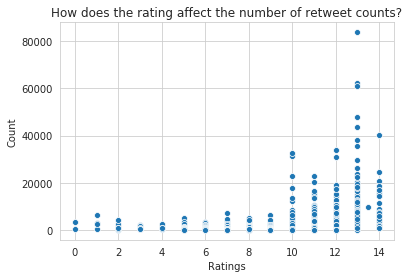

In [86]:
import seaborn as sns
sns.set_style('whitegrid')

# remove any ratings above 20
ratings = tweet_df[tweet_df['rating_numerator'] < 20]['rating_numerator']
count = tweet_df[tweet_df['rating_numerator'] < 20]['retweet_count']
sns.scatterplot(ratings,count)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('How does the rating affect the number of retweet counts?')

Without the outliers, we can see that any tweets below 10 have a low retweet count as compared to those tweets which have a rating of 10 and above with the rating of 13 which gives the most number of retweet counts. This, however, can be dependant on other factors and there seems to be no causal relationship of the two variables. 

### 2. How did the retweet count and favourite count improve over time?

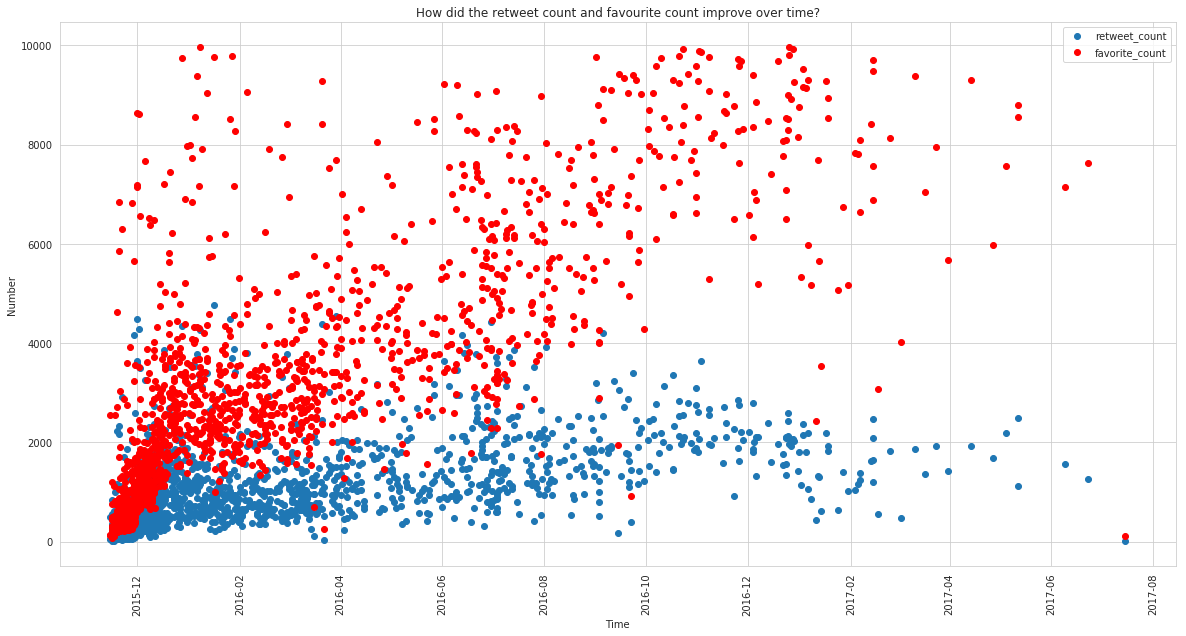

In [87]:
time = pd.to_datetime(tweet_df[tweet_df.favorite_count < 10000].timestamp).dt.date

fig, ax = plt.subplots(figsize=(20,10))
plt.plot_date(time,tweet_df[tweet_df.favorite_count < 10000].retweet_count)
plt.plot_date(time,tweet_df[tweet_df.favorite_count < 10000].favorite_count, color='r')
plt.xlabel('Time')
plt.ylabel('Number')
plt.title('How did the retweet count and favourite count improve over time?')
plt.legend()
ax.xaxis.set_tick_params(rotation=90, labelsize=10)


An obvious trend is seen : In the beginning, the favourite count and the retweet count are similar, yet the number of tweets are more. As the 2016 and 2017 progress, the number of tweets become lesser (seen via the low number of blue and orange dots, but the the number of the counts becomes higher and higher. Another trend noticed is that favourite counts seem to increase drastically, yet the retweet counts remain less than 5000 for the entire duration. 

There are outliers seen in both sets. A couple of tweets have counts over 15000, due to which we could not see the aforementioned trend. However, there are also tweets with next to no retweet or favourite counts even in 2017

### 3. How well does the model perform?

In [88]:
#lets statistically check first
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


There's a few key takeaways from this set :
-  There are tweets with a p1_conf of 1 i.e the neural network is pretty confident of the that picture. 
-  The second and third predictions seem to have very weak confidences.

Let's check out the predictions with 100% confidence..

In [89]:
tweet = image_df[image_df.p1_conf == 1.0]
tweet

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,Prediction
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,prayer_rug,1.011300e-08,doormat,1.740170e-10,not dog


So it turns out that the prediction is that the tweet has no dog, but upon opening and checking out the image manually, I see that there is a dog present in the image, just the model has not picked it up and only focused on the jigsaw puzzle, which is the correct prediction.

Look at this dog looking at how to make jigsaws. 

![Image of Dog](https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg)

### 4. What are the most popular dog names?

In [90]:
from collections import Counter

x = tweet_df['name']

count = Counter(x)
count.most_common(11)

[('None', 706),
 ('Lucy', 11),
 ('Cooper', 10),
 ('Oliver', 10),
 ('Charlie', 10),
 ('Penny', 9),
 ('Tucker', 9),
 ('Lola', 8),
 ('Winston', 8),
 ('Sadie', 8),
 ('Daisy', 7)]

### 7. What types of dogs are there? 

Text(0.5,1,'What type of dog types are there?')

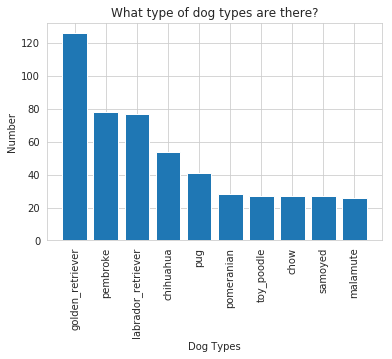

In [91]:
types = image_df[image_df.Prediction == 'dog'].p1.value_counts()
types
plt.bar(types[0:10].index,types[0:10])
plt.xticks(rotation='vertical')
plt.xlabel('Dog Types')
plt.ylabel('Number')
plt.title('What type of dog types are there?')